**VOICE BASED GENDER CLASSIFICATION**
**Team Members:**


1. 18Z207 - ARUN PRASAD P
2. 18Z219 - JAGATHEES S
3. 18Z234 - NAVENKUMAR D
4. 18Z251 - SIVARAJ J


In [76]:
#Importing the required libraries
#Numpy and panda for accessing dataset
import numpy as np
import pandas as pd
#Normalizer for normalizing the dataset
from sklearn.preprocessing import Normalizer
#Test train split is for splitting test and train data from the dataset
from sklearn.model_selection import train_test_split
#Decision tree classifier is for fitting model
from sklearn.tree import DecisionTreeClassifier
#For generating report
from sklearn.metrics import classification_report

In [77]:
#path of the dataset
path = '/content/drive/MyDrive/MachineLearning/voice.csv'
#reading the dataset from the csv file using pandas function
data = pd.read_csv(path)
#Checking whether the data has loaded correctly
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [78]:
#Defining the labels of the dataset
categories = ['male','female']
#Storing features from the data into variable X
X = data.iloc[:,:-1].values
#Storing labels corresponding to the features stored in X
t = data.iloc[:,-1].values
#Defining new list to store the numerical value of nominal value
y = []
for i in t:
  #Storing the numerical value of corresponding nominal value in y(male: 0, female: 1)
  y.append(categories.index(i))
#converting list into numpy array
y = np.array(y)

In [79]:
#Storing extracted features in a file
np.save('attributes.npy',X)
#Storing labels in a file
np.save('labels.npy',y)

In [80]:
#Loading features from file for training
X = np.load('attributes.npy')
#Loading Labels from file for training
y = np.load('labels.npy')

In [81]:
#Spliting data into two parts. 80% of the rows are used for training and remaining 20% of the data will be used for testing and evaluation process.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [82]:
#Creating a decision tree model using sklearn
genderTree = DecisionTreeClassifier(random_state=0)
#Fitting model with train data
genderTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [83]:
#Trainset accuracy
print('Accuracy on Training Set: ',genderTree.score(X_train, y_train))
#Testset accuracy
print('Accuracy on Test Set: ',genderTree.score(X_test, y_test))
#predicting the values for test dataset
y_predict = genderTree.predict(X_test)
#Loss
print('Test data Error : ',np.mean(y_predict != y_test))

Accuracy on Training Set:  1.0
Accuracy on Test Set:  0.9605678233438486
Test data Error :  0.03943217665615142


In [84]:
#Pruning
#This function is to find the maximum number of leaf nodes to achieve the best accuracy
def max_leaf_check(X_train,y_train,X_test,y_test,n):
  nodes = range(2,n+1,1)                                    #Storing number of nodes in variable
  error = []                                              #for storing error occurs in each iteration
  
  #In this for loop, train a model for each value of nodes and take the best model
  for i in range(2,n+1):                                  
    genderTree = DecisionTreeClassifier(max_leaf_nodes=i) #model creation
    genderTree.fit(X_train,y_train)                       #Model fitting
    y_prediction = genderTree.predict(X_test)            #predicting labels for test data
    error.append(np.mean(y_prediction != y_test))         #comparing predicted labels with actual labels to find the error
  print("Minimum Error Rate: ",min(error),end=" ") 
  print("Occured at ",nodes[error.index(min(error))]," Leaf Nodes")
  return nodes[error.index(min(error))]                  #returns the maximum leaf node value to achieve high accuracy

In [85]:
#Pruning(Reducing Number of leaf nodes to avoid overfitting)
#finding maximum leaf node values to minimize the error rate
mx_leaf_nodes = max_leaf_check(X_train,y_train,X_test,y_test,40)
#Training the model with maximum leaf nodes condition
model = DecisionTreeClassifier(criterion = 'gini',max_leaf_nodes= mx_leaf_nodes)
model.fit(X_train, y_train)
#Trainset accuracy
print('Accuracy on Training Set: ',model.score(X_train, y_train))

Minimum Error Rate:  0.028391167192429023 Occured at  14  Leaf Nodes
Accuracy on Training Set:  0.9822415153906867


In [86]:
#Predition for test dataset
y_predict = model.predict(X_test)
#Printing report of test dataset
print(classification_report(y_test, y_predict, target_names=categories, digits=4))

              precision    recall  f1-score   support

        male     0.9701    0.9730    0.9715       333
      female     0.9700    0.9668    0.9684       301

    accuracy                         0.9700       634
   macro avg     0.9700    0.9699    0.9700       634
weighted avg     0.9700    0.9700    0.9700       634



[Text(470.8125, 498.3, 'X[12] <= 0.139\ngini = 0.5\nsamples = 2534\nvalue = [1251, 1283]'),
 Text(261.5625, 407.70000000000005, 'X[5] <= 0.074\ngini = 0.073\nsamples = 1233\nvalue = [1186, 47]'),
 Text(156.9375, 317.1, 'X[12] <= 0.133\ngini = 0.5\nsamples = 55\nvalue = [27, 28]'),
 Text(104.625, 226.5, 'X[17] <= 0.422\ngini = 0.424\nsamples = 36\nvalue = [25, 11]'),
 Text(52.3125, 135.89999999999998, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(156.9375, 135.89999999999998, 'X[9] <= 0.495\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(104.625, 45.299999999999955, 'gini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(209.25, 45.299999999999955, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(209.25, 226.5, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(366.1875, 317.1, 'X[13] <= 0.015\ngini = 0.032\nsamples = 1178\nvalue = [1159, 19]'),
 Text(313.875, 226.5, 'X[3] <= 0.125\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(261.5625, 135.89999999999998, 'gini = 0.

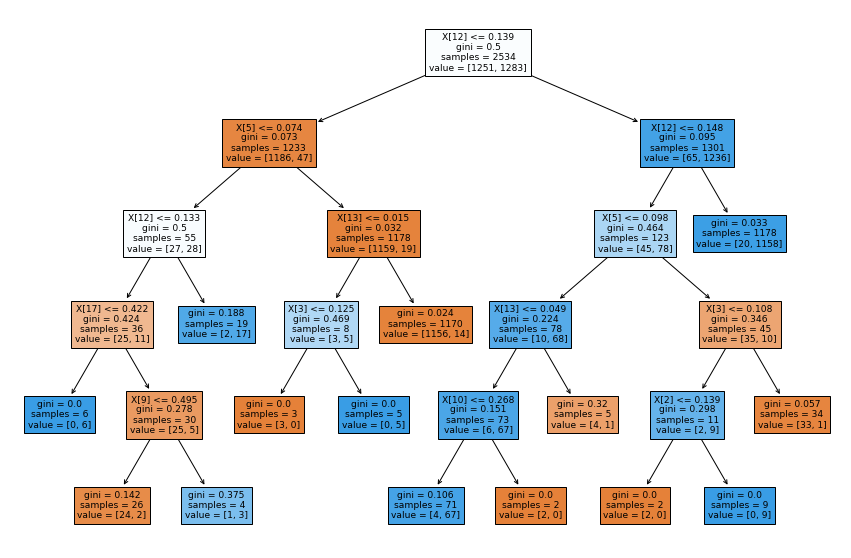

In [87]:
#plotting the Decision tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [88]:
#Testing the decision tree using new real world data
#Voice samples(wav files) are converted into csv file using the rfile
fl = "/content/drive/MyDrive/MachineLearning/Test/voice.csv"
newsample = pd.read_csv(fl)
#loading features of new test dataset
X_new = newsample.iloc[:,:-1].values
#loading labels
t_new = newsample.iloc[:,-1].values

y_new = []
for i in t_new:
  #Storing the numerical value of corresponding nominal value in y(male: 0, female: 1)
  y_new.append(categories.index(i))
#converting list into numpy array
y_new = np.array(y_new)
#predicting labels for new data
y_new_pred = genderTree.predict(X_new)
#Checking actual labels with predicted labels
print(y_new_pred == y_new)
#printing report for new data
print(classification_report(y_new, y_new_pred, target_names=categories, digits=4))

[ True  True False False  True  True False  True  True  True  True  True]
              precision    recall  f1-score   support

        male     1.0000    0.5714    0.7273         7
      female     0.6250    1.0000    0.7692         5

    accuracy                         0.7500        12
   macro avg     0.8125    0.7857    0.7483        12
weighted avg     0.8438    0.7500    0.7448        12



**Input**: [mean frequency, SD, median, Q25, Q75, IQR, skewness, kurtosis, spectral entropy, spectral flatness, mode frequency, centroid, peak frequency, mean of fundamental frequency, min of fundamental frequency, max of fundamental frequency, mean of dominant frequency, min of dominant frequency, max of dominant frequency, range of dominant frequency, modulation index,]
**Output**: 0 for Male and 1 for Female
**Feature Extraction**: The input features are extracted using R Language(In python, handling audio is difficult).